<a href="https://colab.research.google.com/github/Ahnjihye/KOFAC-AI-book/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_%EB%8D%94_%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0(%EC%95%BC%EA%B5%AC%EC%8A%B9%EB%A5%A0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터셋 불러오기

**데이터 불러오는 방법 2가지 중 택1 하여 진행**

1.   깃허브에서 바로 데이터 복사하기

```
import pandas as pd

! git clone https://github.com/Ahnjihye/KOFAC-AI-book.git

data = pd.read_csv("KOFAC-AI-book/baseball.csv") #데이터 불러오기
data.head(10)                                     # 상위 10개 데이터 확인하기
```

2.   PC에 저장된 파일을 업로드하기

```
import pandas as pd
from google.colab import files
uploaded = files.upload()                             #파일 업로드

data = pd.read_csv("baseball.csv") #데이터 불러오기
data.head(10)                                     # 상위 10개 데이터 확인하기
```




In [2]:
import pandas as pd
 
! git clone https://github.com/Ahnjihye/KOFAC-AI-book.git
 
data = pd.read_csv("KOFAC-AI-book/baseball.csv")  #데이터 불러오기
data.head(10)                                     # 상위 10개 데이터 확인하기

fatal: destination path 'KOFAC-AI-book' already exists and is not an empty directory.


,년도,타율,방어율,실제 승률
0,2019,0.274,3.51,0.615
1,2019,0.282,3.61,0.601
2,2019,0.267,3.86,0.552
3,2019,0.278,4.01,0.514
4,2019,0.277,4.29,0.500
5,2019,0.264,4.65,0.437
6,2019,0.256,4.64,0.420
7,2019,0.256,4.80,0.403
8,2018,0.309,4.98,0.646
9,2018,0.275,4.93,0.535


## 2. 데이터를 산점도로 나아내 상관관계 살펴보기

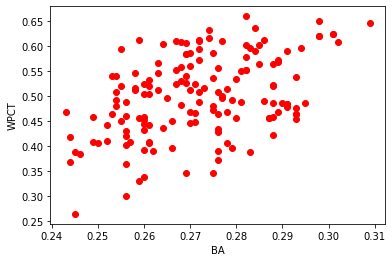

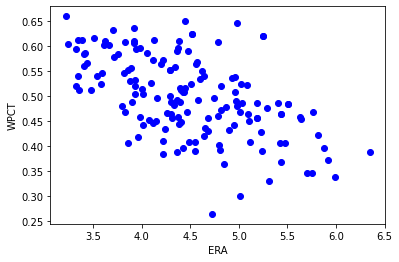

In [3]:
import matplotlib.pyplot as plt                       # 그래프 그리는 라이브러리

# 타율과 승률 산점도
plt.scatter(data['타율'], data['실제 승률'], c= 'r')  
plt.xlabel("BA")                                      # x축 이름 설정하기
plt.ylabel("WPCT")                                    # y축 이름 설정하기
plt.show() # 그래프 출력하기

# 방어율과 승률 산점도
plt.scatter(data['방어율'], data['실제 승률'], c= 'b')
plt.xlabel("ERA")                                      # x축 이름 설정하기
plt.ylabel("WPCT")                                     # y축 이름 설정하기
plt.show()                                             # 그래프 출력하기

## 3. 다중 선형회귀 모델 생성하여 학습시키기

In [7]:
from sklearn.linear_model import LinearRegression     # 선형회귀 라이브러리

model = LinearRegression()                           # 선형회귀 모델 생성하기

# 위에서 만든 선형회귀 모델에 데이터 넣고 학습
model.fit(data[['타율','방어율']], data[['실제 승률']]) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 4. 테스트 데이터로 승률 예측해보기

**데이터 불러오는 방법 2가지 중 택1 하여 진행**

1.   깃허브에서 바로 데이터 복사하기

```
# 위에서 git clone을 진행했다면 한 줄로 테스트데이터를 불러올 수 있다
test_data = pd.read_csv("KOFAC-AI-book/baseball_test.csv") #데이터 불러오기
```

2.   PC에 저장된 파일을 업로드하기

```
from google.colab import files
uploaded = files.upload()                             #파일 업로드

test_data = pd.read_csv("baseball_test.csv") #데이터 불러오기
```




In [8]:
# 테스트 데이터 불러오기 (1번 방법)
test_data = pd.read_csv("KOFAC-AI-book/baseball_test.csv")         

# 학습시킨 모델에 테스트 데이터 넣고 승률 예측해보기
my_predict = model.predict(test_data[['타율','방어율']]) 

# 예측한 승률과 실제 승률 출력
predict = pd.DataFrame(my_predict, columns =['예측한 승률'])
predict_real = pd.concat([predict, test_data[['실제 승률']]], axis=1) 
predict_real

,예측한 승률,실제 승률
0,0.519574,0.500
1,0.381635,0.340
2,0.484797,0.430
3,0.437680,0.422
4,0.367409,0.389
5,0.500917,0.508
6,0.415110,0.417
7,0.413185,0.451
8,0.620011,0.548
9,0.518950,0.492


## 5. 예측 정확도 시각화하여 확인해보기

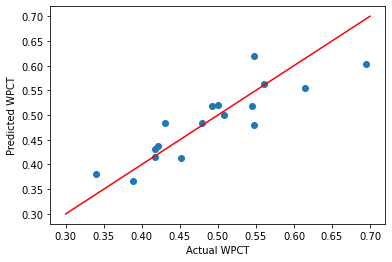

In [9]:
import numpy as np                               # 수치 계산을 위한 라이브러리

# y = x 직선 나타내기
x1 = np.arange(0.3, 0.8, 0.1)  
y1 = x1                                           # y = x 직선
plt.plot(x1, y1, c= 'r')                          # 직선 그리기

# 실제 승률(x축), 예측 승률(y축) 산점도 나타내기
plt.scatter(predict_real['실제 승률'] ,predict_real['예측한 승률'])      
plt.xlabel('Actual WPCT')                       # x축 이름 설정하기
plt.ylabel('Predicted WPCT')                    # y축 이름 설정하기
plt.show()                                      # 그래프 출력하기